In [17]:
import pandas as pd

df = pd.read_excel('credit_card.xls', header=1, sheet_name='Data').iloc[0:,1:]
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [18]:
y_target = df['default']
X_features = df.drop('default', axis=1)

In [19]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [20]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                eval_set=evals, verbose=True)
preds = xgb_wrapper.predict(X_test)

get_clf_eval(y_test,preds)

[0]	validation_0-logloss:0.65098
[1]	validation_0-logloss:0.61655
[2]	validation_0-logloss:0.58829
[3]	validation_0-logloss:0.56477
[4]	validation_0-logloss:0.54521
[5]	validation_0-logloss:0.52831
[6]	validation_0-logloss:0.51409
[7]	validation_0-logloss:0.50211
[8]	validation_0-logloss:0.49196
[9]	validation_0-logloss:0.48334
[10]	validation_0-logloss:0.47595
[11]	validation_0-logloss:0.46976
[12]	validation_0-logloss:0.46431
[13]	validation_0-logloss:0.45975
[14]	validation_0-logloss:0.45588
[15]	validation_0-logloss:0.45267
[16]	validation_0-logloss:0.44979
[17]	validation_0-logloss:0.44750
[18]	validation_0-logloss:0.44531
[19]	validation_0-logloss:0.44350
[20]	validation_0-logloss:0.44199
[21]	validation_0-logloss:0.44060
[22]	validation_0-logloss:0.43940
[23]	validation_0-logloss:0.43832
[24]	validation_0-logloss:0.43745
[25]	validation_0-logloss:0.43678
[26]	validation_0-logloss:0.43607
[27]	validation_0-logloss:0.43536
[28]	validation_0-logloss:0.43476
[29]	validation_0-loglos

[238]	validation_0-logloss:0.42736
[239]	validation_0-logloss:0.42733
[240]	validation_0-logloss:0.42736
[241]	validation_0-logloss:0.42736
[242]	validation_0-logloss:0.42737
[243]	validation_0-logloss:0.42740
오차 행렬
[[4423  231]
 [ 835  511]]
정확도: 0.8223, 정밀도: 0.6887, 재현율: 0.3796,    F1: 0.4895, AUC:0.6650


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

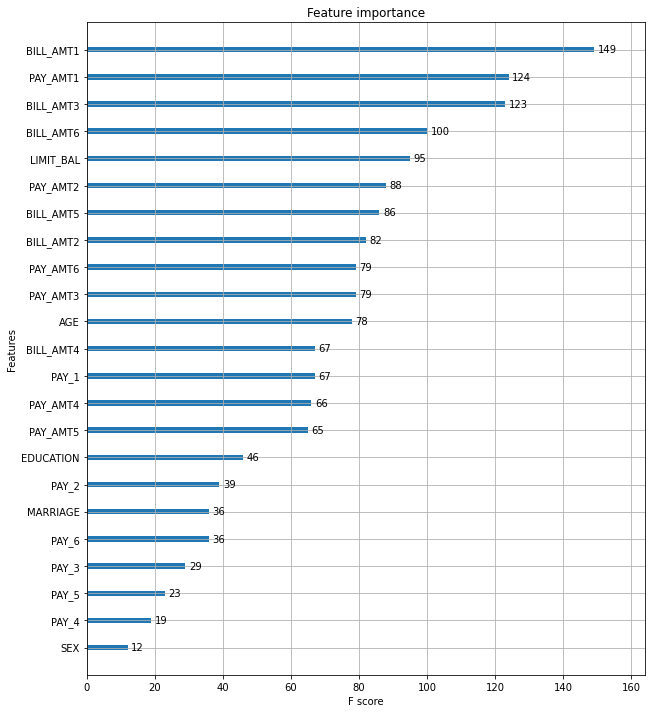

In [21]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_wrapper, ax=ax)

In [22]:
from lightgbm import LGBMClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=400)

score = cross_val_score(lgbm_wrapper, X_features, y_target, scoring='accuracy', cv=3)
print('교차검증 정확도:', np.round(score, 4))
print('평균 검증 정확도:', np.round(np.mean(score), 4))

교차검증 정확도: [0.804  0.8193 0.8191]
평균 검증 정확도: 0.8141


In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(df)
df_pca = pca.transform(df)
print(df_pca.shape)

(30000, 2)


In [24]:
pca_columns=['pca_component_1','pca_component_2']
DF_pca = pd.DataFrame(df_pca,columns=pca_columns)
DF_pca.head(6)

,pca_component_1,pca_component_2
0,-166488.191086,-75538.153664
1,-114226.976817,9780.671250
2,-98432.362180,-33471.387330
3,-71230.675903,-95224.273104
4,-114834.618365,-68729.185233
5,-67063.512703,-97913.796573


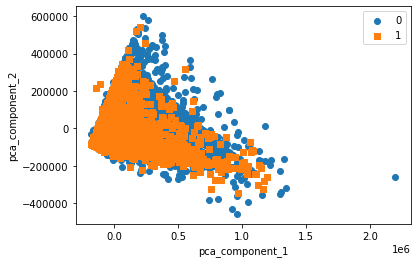

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

DF_pca['default']=df.default

markers=['o', 's']

for i, marker in enumerate(markers):
    x_axis_data = DF_pca[DF_pca['default']==i]['pca_component_1']
    y_axis_data = DF_pca[DF_pca['default']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=i)

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [26]:
y_target = DF_pca['default']
X_features = DF_pca.drop('default', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=400)

score = cross_val_score(lgbm_wrapper, X_features, y_target, scoring='accuracy', cv=3)
print('교차검증 정확도:', np.round(score, 4))
print('평균 검증 정확도:', np.round(np.mean(score), 4))

교차검증 정확도: [0.7722 0.7705 0.7738]
평균 검증 정확도: 0.7722


In [32]:
pca = PCA(n_components=5)

pca.fit(df)
df_pca = pca.transform(df)

pca_columns=['1','2', '3', '4', '5']
DF_pca = pd.DataFrame(df_pca,columns=pca_columns)

DF_pca['default']=df.default

y_target = DF_pca['default']
X_features = DF_pca.drop('default', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=400)

score = cross_val_score(lgbm_wrapper, X_features, y_target, scoring='accuracy', cv=3)
print('교차검증 정확도:', np.round(score, 4))
print('평균 검증 정확도:', np.round(np.mean(score), 4))

교차검증 정확도: [0.7704 0.776  0.7778]
평균 검증 정확도: 0.7747


In [33]:
pca = PCA(n_components=8)

pca.fit(df)
df_pca = pca.transform(df)

pca_columns=['1','2', '3', '4', '5','6','7','8']
DF_pca = pd.DataFrame(df_pca,columns=pca_columns)

DF_pca['default']=df.default

y_target = DF_pca['default']
X_features = DF_pca.drop('default', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=400)

score = cross_val_score(lgbm_wrapper, X_features, y_target, scoring='accuracy', cv=3)
print('교차검증 정확도:', np.round(score, 4))
print('평균 검증 정확도:', np.round(np.mean(score), 4))

교차검증 정확도: [0.7772 0.7818 0.7802]
평균 검증 정확도: 0.7797


In [34]:
pca = PCA(n_components=12)

pca.fit(df)
df_pca = pca.transform(df)

pca_columns=['1','2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
DF_pca = pd.DataFrame(df_pca,columns=pca_columns)

DF_pca['default']=df.default

y_target = DF_pca['default']
X_features = DF_pca.drop('default', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=400)

score = cross_val_score(lgbm_wrapper, X_features, y_target, scoring='accuracy', cv=3)
print('교차검증 정확도:', np.round(score, 4))
print('평균 검증 정확도:', np.round(np.mean(score), 4))

교차검증 정확도: [0.7764 0.7811 0.7861]
평균 검증 정확도: 0.7812


In [35]:
pca = PCA(n_components=16)

pca.fit(df)
df_pca = pca.transform(df)

pca_columns=['1','2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12','13', '14', '15','16']
DF_pca = pd.DataFrame(df_pca,columns=pca_columns)

DF_pca['default']=df.default

y_target = DF_pca['default']
X_features = DF_pca.drop('default', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=400)

score = cross_val_score(lgbm_wrapper, X_features, y_target, scoring='accuracy', cv=3)
print('교차검증 정확도:', np.round(score, 4))
print('평균 검증 정확도:', np.round(np.mean(score), 4))

교차검증 정확도: [0.8374 0.8464 0.8486]
평균 검증 정확도: 0.8441


In [ ]:
pca = PCA(n_components=20)

pca.fit(df)
df_pca = pca.transform(df)

pca_columns=['1','2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12','13', '14', '15','16','17','18','19','20']
DF_pca = pd.DataFrame(df_pca,columns=pca_columns)

DF_pca['default']=df.default

y_target = DF_pca['default']
X_features = DF_pca.drop('default', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=400)

score = cross_val_score(lgbm_wrapper, X_features, y_target, scoring='accuracy', cv=3)
print('교차검증 정확도:', np.round(score, 4))
print('평균 검증 정확도:', np.round(np.mean(score), 4))